<a href="https://colab.research.google.com/github/Bhimsendabby/Machine--Learning-practice/blob/main/Autocoder_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder with MNIST Dataset

This document provides a step-by-step guide to building an autoencoder using the MNIST dataset. The autoencoder is a type of neural network that learns to compress (encode) the data and then reconstruct (decode) it back to the original form.

## Table of Contents

1. [Introduction](#introduction)
2. [Setup & Importing Modules](#setup)
3. [Loading Dataset & Data Preprocessing](#data-preprocessing)
4. [Building the Autoencoder](#building-the-autoencoder)
5. [Training the Autoencoder](#training-the-autoencoder)
6. [Evaluating the Autoencoder](#evaluating-the-autoencoder)
7. [Conclusion](#conclusion)

## Introduction

An autoencoder is a type of artificial neural network used to learn efficient codings of unlabeled data (unsupervised learning). The goal of an autoencoder is to learn a representation (encoding) for a set of data, typically for the purpose of dimensionality reduction.

## Setup

First, ensure you have the necessary libraries installed. You can install them using pip if you haven't already.

```bash
pip install tensorflow keras numpy matplotlib


Ref:- https://www.geeksforgeeks.org/implementing-an-autoencoder-in-pytorch/?ref=lbp

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Setup & Importing Modules

In [1]:
#Importing all the required libraries
import torch
import torch.utils.data
from torch.utils.data import DataLoader,dataset
import torchvision
from torchvision import transforms,datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import time

from torch.utils.data import DataLoader
from torch.utils.data import SubsetRandomSampler
from torch.utils.data import sampler
import matplotlib.colors as mcolors

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
device

device(type='cpu')

# Hyperparameters

In [3]:
#Batch size for iterating images in batching
RANDOM_SEED = 49
LEARNING_RATE = 0.0005
BATCH_SIZE = 32
NUM_EPOCHS = 50
NUM_CLASSES = 10

model_path = '/content/drive/MyDrive/models/Conv_autoencoder.pth'
model_path2 = '/content/drive/MyDrive/models/Conv_autoencoder_2.pth'

# Loading Dataset & Data Preprocessing

In [5]:
# Downloading MNIST Dataset and saving in the root directory
# Using Transform for converting images into torch tensors
train_dataset = datasets.MNIST(root='/content/mnist/train',train=True,transform=transforms.ToTensor(),download=True)
valid_dataset = datasets.MNIST(root='/content/mnist/valid',train=True,transform=transforms.ToTensor(),download=True)
test_dataset = datasets.MNIST(root='/content/mnist/test',train=False,transform=transforms.ToTensor(),download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 17826996.51it/s]


Extracting /content/mnist/train/MNIST/raw/train-images-idx3-ubyte.gz to /content/mnist/train/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 472944.29it/s]


Extracting /content/mnist/train/MNIST/raw/train-labels-idx1-ubyte.gz to /content/mnist/train/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4425912.73it/s]


Extracting /content/mnist/train/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/mnist/train/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 8840152.56it/s]


Extracting /content/mnist/train/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/mnist/train/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:04<00:00, 2118441.62it/s]


Extracting /content/mnist/valid/MNIST/raw/train-images-idx3-ubyte.gz to /content/mnist/valid/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 479168.42it/s]


Extracting /content/mnist/valid/MNIST/raw/train-labels-idx1-ubyte.gz to /content/mnist/valid/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4355646.65it/s]


Extracting /content/mnist/valid/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/mnist/valid/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3202846.13it/s]


Extracting /content/mnist/valid/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/mnist/valid/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 14473995.03it/s]


Extracting /content/mnist/test/MNIST/raw/train-images-idx3-ubyte.gz to /content/mnist/test/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 489251.33it/s]


Extracting /content/mnist/test/MNIST/raw/train-labels-idx1-ubyte.gz to /content/mnist/test/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4358125.17it/s]


Extracting /content/mnist/test/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/mnist/test/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2213890.62it/s]

Extracting /content/mnist/test/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/mnist/test/MNIST/raw



In [6]:
# Initialing DataLoader for loading dataset in batches
# 100 images, batch size =10 then dataloader with iterate 100 images by 10 by 10
num_workers = 2
train_loader = DataLoader(dataset=train_dataset,batch_size=BATCH_SIZE,num_workers=num_workers,shuffle=True)
valid_loader = DataLoader(dataset=valid_dataset,batch_size=BATCH_SIZE,num_workers=num_workers,shuffle=True)
test_loader = DataLoader(dataset=test_dataset,batch_size=BATCH_SIZE,num_workers=num_workers,shuffle=True)

In [7]:
# Checking the dataset
print('Training Set:\n')
for images, labels in train_loader:
    print('Image batch dimensions:', images.size())
    print('Image label dimensions:', labels.size())
    print(labels[:10])
    break

Training Set:

Image batch dimensions: torch.Size([32, 1, 28, 28])
Image label dimensions: torch.Size([32])
tensor([1, 0, 2, 9, 3, 8, 6, 5, 8, 6])


# Autoencoder With Convolution Layers

In [8]:
class Reshape(nn.Module):
    def __init__(self, *args):
        super().__init__()
        self.shape = args

    def forward(self, x):
        return x.view(self.shape)


class Trim(nn.Module):
    def __init__(self, *args):
        super().__init__()

    def forward(self, x):
        return x[:, :, :28, :28]

In [9]:
import torch
import torch.nn as nn

class ConvAutoencoder(nn.Module):
    def __init__(self, latent_dim=128):
        super(ConvAutoencoder, self).__init__()


        self.encoder = nn.Sequential(
                nn.Conv2d(1, 32, stride=(1, 1), kernel_size=(3, 3),     padding=1),
                nn.LeakyReLU(0.01),
                nn.Conv2d(32, 64, stride=(2, 2), kernel_size=(3, 3), padding=1),
                nn.LeakyReLU(0.01),
                nn.Conv2d(64, 64, stride=(2, 2), kernel_size=(3, 3), padding=1),
                nn.LeakyReLU(0.01),
                nn.Conv2d(64, 64, stride=(1, 1), kernel_size=(3, 3), padding=1),
                nn.Flatten(),
                nn.Linear(3136, 2)
        )
        self.decoder = nn.Sequential(
                torch.nn.Linear(2, 3136),
                Reshape(-1, 64, 7, 7),
                nn.ConvTranspose2d(64, 64, stride=(1, 1), kernel_size=(3, 3), padding=1),
                nn.LeakyReLU(0.01),
                nn.ConvTranspose2d(64, 64, stride=(2, 2), kernel_size=(3, 3), padding=1),
                nn.LeakyReLU(0.01),
                nn.ConvTranspose2d(64, 32, stride=(2, 2), kernel_size=(3, 3), padding=0),
                nn.LeakyReLU(0.01),
                nn.ConvTranspose2d(32, 1, stride=(1, 1), kernel_size=(3, 3), padding=0),
                Trim(),  # 1x29x29 -> 1x28x28
                nn.Sigmoid()
                )
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x



class ConvAutoencoder_2(nn.Module):
    def __init__(self, latent_dim=128):
        super(ConvAutoencoder_2, self).__init__()
        # Encoder
        self.encoder_conv = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),  # [batch, 1, 28, 28] -> [batch, 16, 14, 14]
            nn.LeakyReLU(0.01),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1), # [batch, 16, 14, 14] -> [batch, 32, 7, 7]
            nn.LeakyReLU(0.01),
            nn.Conv2d(32, 64, kernel_size=7)  # [batch, 32, 7, 7] -> [batch, 64, 1, 1]
        )
        self.encoder_fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64*1*1, latent_dim)  # Reduce to latent_dim
        )

        # Decoder
        self.decoder_fc = nn.Sequential(
            nn.Linear(latent_dim, 64*1*1),  # Expand from latent_dim
            nn.Unflatten(1, (64, 1, 1))
        )
        self.decoder_conv = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=7),  # [batch, 64, 1, 1] -> [batch, 32, 7, 7]
            nn.LeakyReLU(0.01),
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),  # [batch, 32, 7, 7] -> [batch, 16, 14, 14]
            nn.LeakyReLU(0.01),
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),  # [batch, 16, 14, 14] -> [batch, 1, 28, 28]
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder_conv(x)
        x = self.encoder_fc(x)
        x = self.decoder_fc(x)
        x = self.decoder_conv(x)
        return x

In [10]:
# Example usage
latent_dim = 128
autoencoder = ConvAutoencoder(latent_dim=latent_dim).to(device)
autoencoder_2 = ConvAutoencoder_2(latent_dim=latent_dim).to(device)
print(autoencoder)
print(autoencoder_2)

ConvAutoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): LeakyReLU(negative_slope=0.01)
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): LeakyReLU(negative_slope=0.01)
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): Flatten(start_dim=1, end_dim=-1)
    (8): Linear(in_features=3136, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=3136, bias=True)
    (1): Reshape()
    (2): ConvTranspose2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): LeakyReLU(negative_slope=0.01)
    (4): ConvTranspose2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): LeakyReLU(negative_slope=0.01)
    (6): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(2, 2))
    (7): Le

In [11]:
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LEARNING_RATE)
optimizer_2 = torch.optim.Adam(autoencoder_2.parameters(), lr=LEARNING_RATE)

In [12]:
def compute_epoch_loss_autoencoder(model, data_loader, loss_fn, device):
    model.eval()
    curr_loss, num_examples = 0., 0
    with torch.no_grad():
        for features, _ in data_loader:
            features = features.to(device)
            logits = model(features)
            loss = loss_fn(logits, features, reduction='sum')
            num_examples += features.size(0)
            curr_loss += loss

        curr_loss = curr_loss / num_examples
        return curr_loss


def train_autoencoder(num_epochs, model, optimizer, device,
                               train_loader,loss_fun,model_path, valid_loader=None,
                                logging_interval=100,
                               skip_epoch_stats=False):
  log_dict = {'train_loss_per_batch': [],
                'train_loss_per_epoch': []}

  start_time = time.time()

  # Training loop
  for epoch in range(NUM_EPOCHS):
      model.train()
      train_loss = 0.0
      for i, (images, _) in enumerate(train_loader):
          images = images.to(device)  # Move images to the same device as the model

          # Forward pass
          reconstructions = model(images)

          # Compute the loss
          loss = loss_fun(images,reconstructions)

          # Backward pass and optimization
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          # LOGGING
          log_dict['train_loss_per_batch'].append(loss.item())

          if not i % logging_interval:
            print('Epoch: %03d/%03d | Batch %04d/%04d | Loss: %.4f'% (epoch+1, num_epochs, i,
                          len(train_loader), loss))



      if not skip_epoch_stats:
            model.eval()

            with torch.set_grad_enabled(False):  # save memory during inference

                train_loss = compute_epoch_loss_autoencoder(
                    model, train_loader, loss_fun, device)
                print('***Epoch: %03d/%03d | Loss: %.3f' % (
                      epoch+1, num_epochs, train_loss))
                log_dict['train_loss_per_epoch'].append(train_loss.item())

      print('Time elapsed: %.2f min' % ((time.time() - start_time)/60))

  print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))
  if model_path is not None:
    torch.save(model.state_dict(), model_path)

  return log_dict

In [35]:
log_dict = train_autoencoder(num_epochs=NUM_EPOCHS, model=autoencoder,
                                optimizer=optimizer, device=device,model_path=model_path,
                                train_loader=train_loader,loss_fun=loss_function,
                                valid_loader=valid_loader,
                                skip_epoch_stats=True,
                                logging_interval=250)

Epoch: 001/050 | Batch 0000/1875 | Loss: 0.0421
Epoch: 001/050 | Batch 0250/1875 | Loss: 0.0387
Epoch: 001/050 | Batch 0500/1875 | Loss: 0.0356
Epoch: 001/050 | Batch 0750/1875 | Loss: 0.0308
Epoch: 001/050 | Batch 1000/1875 | Loss: 0.0398
Epoch: 001/050 | Batch 1250/1875 | Loss: 0.0396
Epoch: 001/050 | Batch 1500/1875 | Loss: 0.0357
Epoch: 001/050 | Batch 1750/1875 | Loss: 0.0386
Time elapsed: 0.26 min
Epoch: 002/050 | Batch 0000/1875 | Loss: 0.0397
Epoch: 002/050 | Batch 0250/1875 | Loss: 0.0397
Epoch: 002/050 | Batch 0500/1875 | Loss: 0.0459
Epoch: 002/050 | Batch 0750/1875 | Loss: 0.0426
Epoch: 002/050 | Batch 1000/1875 | Loss: 0.0401
Epoch: 002/050 | Batch 1250/1875 | Loss: 0.0362
Epoch: 002/050 | Batch 1500/1875 | Loss: 0.0326
Epoch: 002/050 | Batch 1750/1875 | Loss: 0.0415
Time elapsed: 0.55 min
Epoch: 003/050 | Batch 0000/1875 | Loss: 0.0363
Epoch: 003/050 | Batch 0250/1875 | Loss: 0.0332
Epoch: 003/050 | Batch 0500/1875 | Loss: 0.0367
Epoch: 003/050 | Batch 0750/1875 | Loss: 0

In [15]:
def imshow(img, title=None):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    if title is not None:
        plt.title(title)
    plt.show()

def evaluate_model(autoencoder, test_loader, loss_function, device):
    autoencoder.eval()
    test_loss = 0
    with torch.no_grad():
        for images, _ in test_loader:
            images = images.to(device)
            reconstructions = autoencoder(images)
            loss = loss_function(reconstructions, images)
            test_loss += loss.item()

    test_loss /= len(test_loader)
    print(f'Test Loss (MSE): {test_loss:.4f}')

    # Visualize some of the reconstructed images
    dataiter = iter(test_loader)
    images, _ = next(dataiter)
    images = images.to(device)
    with torch.no_grad():
        reconstructions = autoencoder(images)

    # Move to CPU for visualization
    images = images.cpu()
    reconstructions = reconstructions.cpu()

    # Display the original images
    print("Original Images")
    imshow(torchvision.utils.make_grid(images))

    # Display the reconstructed images
    print("Reconstructed Images")
    imshow(torchvision.utils.make_grid(reconstructions))

Model state dictionary loaded from /content/drive/MyDrive/models/Conv_autoencoder.pth
Test Loss (MSE): 0.0395
Original Images


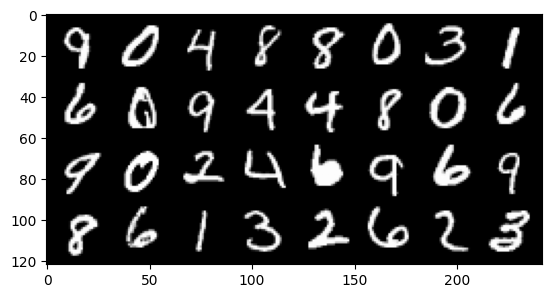

Reconstructed Images


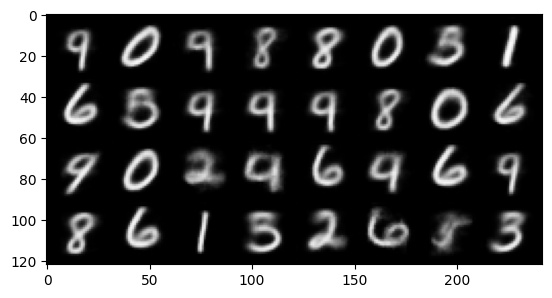

In [36]:
# Define the path to load the model from Google Drive
model_path = '/content/drive/MyDrive/models/Conv_autoencoder.pth'

# Create a new instance of the model
autoencoder = ConvAutoencoder(latent_dim=latent_dim).to(device)

# Load the state dictionary
autoencoder.load_state_dict(torch.load(model_path))
print(f"Model state dictionary loaded from {model_path}")


evaluate_model(autoencoder, test_loader, loss_function, device)

In [13]:
log_dict = train_autoencoder(num_epochs=NUM_EPOCHS, model=autoencoder_2,
                                optimizer=optimizer, device=device,model_path=model_path2,
                                train_loader=train_loader,loss_fun=loss_function,
                                valid_loader=valid_loader,
                                skip_epoch_stats=True,
                                logging_interval=250)

Epoch: 001/050 | Batch 0000/1875 | Loss: 0.2276
Epoch: 001/050 | Batch 0250/1875 | Loss: 0.2282
Epoch: 001/050 | Batch 0500/1875 | Loss: 0.2274
Epoch: 001/050 | Batch 0750/1875 | Loss: 0.2285
Epoch: 001/050 | Batch 1000/1875 | Loss: 0.2280
Epoch: 001/050 | Batch 1250/1875 | Loss: 0.2276
Epoch: 001/050 | Batch 1500/1875 | Loss: 0.2283
Epoch: 001/050 | Batch 1750/1875 | Loss: 0.2295
Time elapsed: 0.59 min
Epoch: 002/050 | Batch 0000/1875 | Loss: 0.2276
Epoch: 002/050 | Batch 0250/1875 | Loss: 0.2273
Epoch: 002/050 | Batch 0500/1875 | Loss: 0.2278
Epoch: 002/050 | Batch 0750/1875 | Loss: 0.2283
Epoch: 002/050 | Batch 1000/1875 | Loss: 0.2288
Epoch: 002/050 | Batch 1250/1875 | Loss: 0.2274
Epoch: 002/050 | Batch 1500/1875 | Loss: 0.2272
Epoch: 002/050 | Batch 1750/1875 | Loss: 0.2291
Time elapsed: 1.19 min
Epoch: 003/050 | Batch 0000/1875 | Loss: 0.2288
Epoch: 003/050 | Batch 0250/1875 | Loss: 0.2278
Epoch: 003/050 | Batch 0500/1875 | Loss: 0.2284
Epoch: 003/050 | Batch 0750/1875 | Loss: 0

Model state dictionary loaded from /content/drive/MyDrive/models/Conv_autoencoder_2.pth
Test Loss (MSE): 0.2283
Original Images


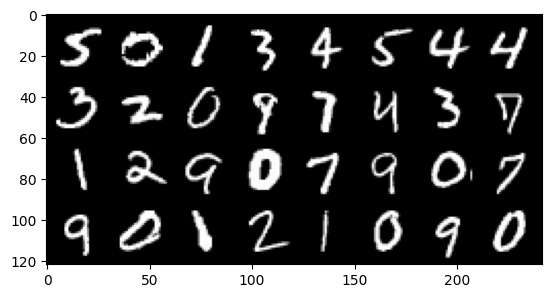

Reconstructed Images


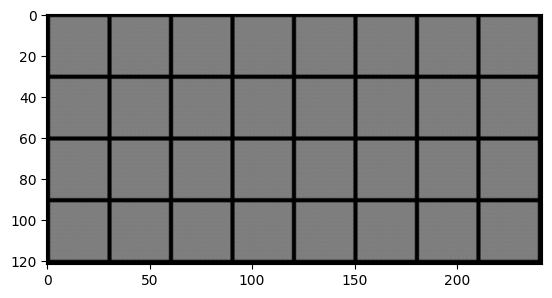

In [16]:
# Define the path to load the model from Google Drive
model_path = '/content/drive/MyDrive/models/Conv_autoencoder_2.pth'

# Create a new instance of the model
autoencoder_2 = ConvAutoencoder_2(latent_dim=latent_dim).to(device)

# Load the state dictionary
autoencoder_2.load_state_dict(torch.load(model_path))
print(f"Model state dictionary loaded from {model_path}")


evaluate_model(autoencoder_2, test_loader, loss_function, device)